<a href="https://colab.research.google.com/github/ptleskin/of-Dogs-and-Cats/blob/main/of_Dogs_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.linalg import matrix_power
from scipy.special import comb
from scipy.signal import convolve2d
from sklearn.preprocessing import minmax_scale

## Define functions

In [2]:
def drawHeatmapMatrix(M, labels, xlabels, ylabels, 
                      contrast=1/200, 
                      format='.2f', 
                      cmap = "Blues",
                      normalize = 'rows',
                      cbar = True):
  M2 = convolve2d(M, np.array([[-1,-3,-1],[-3,17,-3],[-1,-3,-1]]), mode = 'same', boundary="symm")
  
  if normalize == 'all':
    # scale to actual range
    hi=np.max(M)
    lo=np.min(M)
    M2 = M2*contrast+M 
    M2 = (M2-np.min(M2))/(np.max(M2)-np.min(M2))*(hi-lo)+lo
  elif normalize == 'columns':
    M2 = minmax_scale(M2*contrast+M, feature_range=(np.min(M), np.max(M)), axis=0)
  else:
  # scaling by columns or rows:
    M2 = minmax_scale(M2*contrast+M, feature_range=(np.min(M), np.max(M)), axis=1)

  sns.heatmap(M2,
              annot = labels,
              center = 0.1, 
              fmt = format,
              square = True, 
              linewidths = 2,
              robust = True,
              xticklabels = xlabels,
              yticklabels = ylabels,
              cmap = cmap,
              cbar = cbar, 
              #cbar_kws = dict(ticks=[.0, .25, .5], shrink=0.82) 
              cbar_kws = dict(shrink=0.82)
              )

# Brute Force
A sequence of $N$ animals can be represented as a binary number in the range $[0, 2^{N}-1]$, e.g. $01111 11111$ would mean a cat followed by nine dogs. 

The following code lists all combinations using binary numbers Cat=0 and Dog=1.

NB: Cats are labels as zero, because
*   I am a dog owner
*   Cats always want to sit in circles  [[1]](https://www.dailymail.co.uk/news/article-2840233/The-great-moggie-mystery-s-question-s-got-internet-purring-cats-sit-circles-refuse-move.html)


In [3]:
# total number of animals
N = 10
labels = {'0': "Cat", '1': "Dog"}

# for converting an integer into a binary representation string:
fmt = "{:0"+str(N)+"b}"

# list all posibilities
arr = [fmt.format(n) for n in range(2**N)]
#  no cats next to one another:
arr = [st for st in arr if '00' not in st]

df = pd.DataFrame(dict(Arrangements = arr))
df.index += 1
display(df)
print("In total {} combinations.".format(len(arr)))

,Arrangements
1,0101010101
2,0101010110
3,0101010111
4,0101011010
5,0101011011
...,...
140,1111111010
141,1111111011
142,1111111101
143,1111111110


In total 144 combinations.


## show table with labels

In [4]:
# convert integer into a string sequence:
arrT = np.array([[labels.get(x) for x in st] for st in arr]).T
df = pd.DataFrame(dict([(k,v) for k,v in enumerate(arrT, start=1)]))
df.index += 1
display(df)

,1,2,3,4,5,6,7,8,9,10
1,Cat,Dog,Cat,Dog,Cat,Dog,Cat,Dog,Cat,Dog
2,Cat,Dog,Cat,Dog,Cat,Dog,Cat,Dog,Dog,Cat
3,Cat,Dog,Cat,Dog,Cat,Dog,Cat,Dog,Dog,Dog
4,Cat,Dog,Cat,Dog,Cat,Dog,Dog,Cat,Dog,Cat
5,Cat,Dog,Cat,Dog,Cat,Dog,Dog,Cat,Dog,Dog
...,...,...,...,...,...,...,...,...,...,...
140,Dog,Dog,Dog,Dog,Dog,Dog,Dog,Cat,Dog,Cat
141,Dog,Dog,Dog,Dog,Dog,Dog,Dog,Cat,Dog,Dog
142,Dog,Dog,Dog,Dog,Dog,Dog,Dog,Dog,Cat,Dog
143,Dog,Dog,Dog,Dog,Dog,Dog,Dog,Dog,Dog,Cat


Count frequences and ratio

In [5]:
from collections import Counter
cn = Counter()
[cn.update(v) for v in arrT]
print(cn)
cats = cn['Cat']
dogs = cn['Dog']
total = cats+dogs

print("Ratio cats/dogs: {}".format(cats/dogs)) # 0.39285845418023574
print("Cats: {:.2f}%".format(100*cats/total))
print("Dogs: {:.2f}%".format(100*dogs/total))

Counter({'Dog': 1020, 'Cat': 420})
Ratio cats/dogs: 0.4117647058823529
Cats: 29.17%
Dogs: 70.83%


# Combinatorics
In this block we will calculate the number using combinatorics, e.g. using the [Stars and bars](https://en.wikipedia.org/wiki/Stars_and_bars_(combinatorics)) principle.

Like for instance, if there was $d=7$ dogs, there are $d-1=6$ gaps between them, one position at the left end, and one at the right end. These will be the $d+1=8$ positions where the $N-d=3$ cats can be placed.

$?$ ![picture](https://lh3.googleusercontent.com/fife/ABSRlIqvqgZVGVmZM-R7Z0_-hx9OS6op7cpksxGFETCrtcnGz9na1fR-gs6G4lf6iiMdiemlu2gBY01ADi27LMdDEQdFfw4_FJYOeTH99LAqjGK6yybOzOWM_I30ztXb6VV1smKUaiYNtHVPMj1mI4DvLMi4IferuPdDYFlw5u4kqalqZ7AruMRKavkZN-xgi7ygGF84DP28VJ2MfZEVxDwJz-6cWIyfppWpUejrMC135Pc24v0Q4KCkr8duRq6Rupd8XnaSU7-XLnRL76d688LvVwiCIFg3goggnUV1eylD6NjA5vj0JI4jT42i8cOpKNIHI1cuqzRk9ZOd4qbQWfZ1-gEsKD4KV_3DR8-5U8ebzKYa8oEG7wc03PTxAT6G8dPgK5-is3Sb_sF27yat8aVAYEjZ_RSRMbh1S8sbu24yYwLTuzrZWknZTqwZk5TW6p94fbrH_NiSGAbK0o0vYVnZkU4tkIZ-CEQG1h_4V9CFwcZoMhmpSCqTQJL8keN3UZ_na0gzE3hiuz3oomzG3Cc1-32RXfx75sn2yiRqGyCRi-HZLFo44bA4xSSV1sYxffrE7fYZFjbmaGzl1N0pVbEuZE8zPC6UpRTGbOsohsmpzy_HQw4XAjopSl1doibl2UamKL6QOOQ9zB_rTXD-bgtbmCTde9cnEEdtv1BU35OvNC8RODvlw6lS7GSk_W-YN7w1Rm7XVqe_2iYAvX84cF8ccId5waT-Ibu3poc=w320-h200-k-ft) $?$ ![picture](https://lh3.googleusercontent.com/fife/ABSRlIqvqgZVGVmZM-R7Z0_-hx9OS6op7cpksxGFETCrtcnGz9na1fR-gs6G4lf6iiMdiemlu2gBY01ADi27LMdDEQdFfw4_FJYOeTH99LAqjGK6yybOzOWM_I30ztXb6VV1smKUaiYNtHVPMj1mI4DvLMi4IferuPdDYFlw5u4kqalqZ7AruMRKavkZN-xgi7ygGF84DP28VJ2MfZEVxDwJz-6cWIyfppWpUejrMC135Pc24v0Q4KCkr8duRq6Rupd8XnaSU7-XLnRL76d688LvVwiCIFg3goggnUV1eylD6NjA5vj0JI4jT42i8cOpKNIHI1cuqzRk9ZOd4qbQWfZ1-gEsKD4KV_3DR8-5U8ebzKYa8oEG7wc03PTxAT6G8dPgK5-is3Sb_sF27yat8aVAYEjZ_RSRMbh1S8sbu24yYwLTuzrZWknZTqwZk5TW6p94fbrH_NiSGAbK0o0vYVnZkU4tkIZ-CEQG1h_4V9CFwcZoMhmpSCqTQJL8keN3UZ_na0gzE3hiuz3oomzG3Cc1-32RXfx75sn2yiRqGyCRi-HZLFo44bA4xSSV1sYxffrE7fYZFjbmaGzl1N0pVbEuZE8zPC6UpRTGbOsohsmpzy_HQw4XAjopSl1doibl2UamKL6QOOQ9zB_rTXD-bgtbmCTde9cnEEdtv1BU35OvNC8RODvlw6lS7GSk_W-YN7w1Rm7XVqe_2iYAvX84cF8ccId5waT-Ibu3poc=w320-h200-k-ft)$?$ ![picture](https://lh3.googleusercontent.com/fife/ABSRlIqvqgZVGVmZM-R7Z0_-hx9OS6op7cpksxGFETCrtcnGz9na1fR-gs6G4lf6iiMdiemlu2gBY01ADi27LMdDEQdFfw4_FJYOeTH99LAqjGK6yybOzOWM_I30ztXb6VV1smKUaiYNtHVPMj1mI4DvLMi4IferuPdDYFlw5u4kqalqZ7AruMRKavkZN-xgi7ygGF84DP28VJ2MfZEVxDwJz-6cWIyfppWpUejrMC135Pc24v0Q4KCkr8duRq6Rupd8XnaSU7-XLnRL76d688LvVwiCIFg3goggnUV1eylD6NjA5vj0JI4jT42i8cOpKNIHI1cuqzRk9ZOd4qbQWfZ1-gEsKD4KV_3DR8-5U8ebzKYa8oEG7wc03PTxAT6G8dPgK5-is3Sb_sF27yat8aVAYEjZ_RSRMbh1S8sbu24yYwLTuzrZWknZTqwZk5TW6p94fbrH_NiSGAbK0o0vYVnZkU4tkIZ-CEQG1h_4V9CFwcZoMhmpSCqTQJL8keN3UZ_na0gzE3hiuz3oomzG3Cc1-32RXfx75sn2yiRqGyCRi-HZLFo44bA4xSSV1sYxffrE7fYZFjbmaGzl1N0pVbEuZE8zPC6UpRTGbOsohsmpzy_HQw4XAjopSl1doibl2UamKL6QOOQ9zB_rTXD-bgtbmCTde9cnEEdtv1BU35OvNC8RODvlw6lS7GSk_W-YN7w1Rm7XVqe_2iYAvX84cF8ccId5waT-Ibu3poc=w320-h200-k-ft)$?$ ![picture](https://lh3.googleusercontent.com/fife/ABSRlIqvqgZVGVmZM-R7Z0_-hx9OS6op7cpksxGFETCrtcnGz9na1fR-gs6G4lf6iiMdiemlu2gBY01ADi27LMdDEQdFfw4_FJYOeTH99LAqjGK6yybOzOWM_I30ztXb6VV1smKUaiYNtHVPMj1mI4DvLMi4IferuPdDYFlw5u4kqalqZ7AruMRKavkZN-xgi7ygGF84DP28VJ2MfZEVxDwJz-6cWIyfppWpUejrMC135Pc24v0Q4KCkr8duRq6Rupd8XnaSU7-XLnRL76d688LvVwiCIFg3goggnUV1eylD6NjA5vj0JI4jT42i8cOpKNIHI1cuqzRk9ZOd4qbQWfZ1-gEsKD4KV_3DR8-5U8ebzKYa8oEG7wc03PTxAT6G8dPgK5-is3Sb_sF27yat8aVAYEjZ_RSRMbh1S8sbu24yYwLTuzrZWknZTqwZk5TW6p94fbrH_NiSGAbK0o0vYVnZkU4tkIZ-CEQG1h_4V9CFwcZoMhmpSCqTQJL8keN3UZ_na0gzE3hiuz3oomzG3Cc1-32RXfx75sn2yiRqGyCRi-HZLFo44bA4xSSV1sYxffrE7fYZFjbmaGzl1N0pVbEuZE8zPC6UpRTGbOsohsmpzy_HQw4XAjopSl1doibl2UamKL6QOOQ9zB_rTXD-bgtbmCTde9cnEEdtv1BU35OvNC8RODvlw6lS7GSk_W-YN7w1Rm7XVqe_2iYAvX84cF8ccId5waT-Ibu3poc=w320-h200-k-ft)$?$ ![picture](https://lh3.googleusercontent.com/fife/ABSRlIqvqgZVGVmZM-R7Z0_-hx9OS6op7cpksxGFETCrtcnGz9na1fR-gs6G4lf6iiMdiemlu2gBY01ADi27LMdDEQdFfw4_FJYOeTH99LAqjGK6yybOzOWM_I30ztXb6VV1smKUaiYNtHVPMj1mI4DvLMi4IferuPdDYFlw5u4kqalqZ7AruMRKavkZN-xgi7ygGF84DP28VJ2MfZEVxDwJz-6cWIyfppWpUejrMC135Pc24v0Q4KCkr8duRq6Rupd8XnaSU7-XLnRL76d688LvVwiCIFg3goggnUV1eylD6NjA5vj0JI4jT42i8cOpKNIHI1cuqzRk9ZOd4qbQWfZ1-gEsKD4KV_3DR8-5U8ebzKYa8oEG7wc03PTxAT6G8dPgK5-is3Sb_sF27yat8aVAYEjZ_RSRMbh1S8sbu24yYwLTuzrZWknZTqwZk5TW6p94fbrH_NiSGAbK0o0vYVnZkU4tkIZ-CEQG1h_4V9CFwcZoMhmpSCqTQJL8keN3UZ_na0gzE3hiuz3oomzG3Cc1-32RXfx75sn2yiRqGyCRi-HZLFo44bA4xSSV1sYxffrE7fYZFjbmaGzl1N0pVbEuZE8zPC6UpRTGbOsohsmpzy_HQw4XAjopSl1doibl2UamKL6QOOQ9zB_rTXD-bgtbmCTde9cnEEdtv1BU35OvNC8RODvlw6lS7GSk_W-YN7w1Rm7XVqe_2iYAvX84cF8ccId5waT-Ibu3poc=w320-h200-k-ft)$?$ ![picture](https://lh3.googleusercontent.com/fife/ABSRlIqvqgZVGVmZM-R7Z0_-hx9OS6op7cpksxGFETCrtcnGz9na1fR-gs6G4lf6iiMdiemlu2gBY01ADi27LMdDEQdFfw4_FJYOeTH99LAqjGK6yybOzOWM_I30ztXb6VV1smKUaiYNtHVPMj1mI4DvLMi4IferuPdDYFlw5u4kqalqZ7AruMRKavkZN-xgi7ygGF84DP28VJ2MfZEVxDwJz-6cWIyfppWpUejrMC135Pc24v0Q4KCkr8duRq6Rupd8XnaSU7-XLnRL76d688LvVwiCIFg3goggnUV1eylD6NjA5vj0JI4jT42i8cOpKNIHI1cuqzRk9ZOd4qbQWfZ1-gEsKD4KV_3DR8-5U8ebzKYa8oEG7wc03PTxAT6G8dPgK5-is3Sb_sF27yat8aVAYEjZ_RSRMbh1S8sbu24yYwLTuzrZWknZTqwZk5TW6p94fbrH_NiSGAbK0o0vYVnZkU4tkIZ-CEQG1h_4V9CFwcZoMhmpSCqTQJL8keN3UZ_na0gzE3hiuz3oomzG3Cc1-32RXfx75sn2yiRqGyCRi-HZLFo44bA4xSSV1sYxffrE7fYZFjbmaGzl1N0pVbEuZE8zPC6UpRTGbOsohsmpzy_HQw4XAjopSl1doibl2UamKL6QOOQ9zB_rTXD-bgtbmCTde9cnEEdtv1BU35OvNC8RODvlw6lS7GSk_W-YN7w1Rm7XVqe_2iYAvX84cF8ccId5waT-Ibu3poc=w320-h200-k-ft)$?$ ![picture](https://lh3.googleusercontent.com/fife/ABSRlIqvqgZVGVmZM-R7Z0_-hx9OS6op7cpksxGFETCrtcnGz9na1fR-gs6G4lf6iiMdiemlu2gBY01ADi27LMdDEQdFfw4_FJYOeTH99LAqjGK6yybOzOWM_I30ztXb6VV1smKUaiYNtHVPMj1mI4DvLMi4IferuPdDYFlw5u4kqalqZ7AruMRKavkZN-xgi7ygGF84DP28VJ2MfZEVxDwJz-6cWIyfppWpUejrMC135Pc24v0Q4KCkr8duRq6Rupd8XnaSU7-XLnRL76d688LvVwiCIFg3goggnUV1eylD6NjA5vj0JI4jT42i8cOpKNIHI1cuqzRk9ZOd4qbQWfZ1-gEsKD4KV_3DR8-5U8ebzKYa8oEG7wc03PTxAT6G8dPgK5-is3Sb_sF27yat8aVAYEjZ_RSRMbh1S8sbu24yYwLTuzrZWknZTqwZk5TW6p94fbrH_NiSGAbK0o0vYVnZkU4tkIZ-CEQG1h_4V9CFwcZoMhmpSCqTQJL8keN3UZ_na0gzE3hiuz3oomzG3Cc1-32RXfx75sn2yiRqGyCRi-HZLFo44bA4xSSV1sYxffrE7fYZFjbmaGzl1N0pVbEuZE8zPC6UpRTGbOsohsmpzy_HQw4XAjopSl1doibl2UamKL6QOOQ9zB_rTXD-bgtbmCTde9cnEEdtv1BU35OvNC8RODvlw6lS7GSk_W-YN7w1Rm7XVqe_2iYAvX84cF8ccId5waT-Ibu3poc=w320-h200-k-ft) $?$ 

So we are placing $N-d=3$ cats in $d+1=8$ positions. Since the order of the cats does not matter, there are 
${d+1 \choose N-d} = {8 \choose 3} = 56$ ways to choose the cat positions.

The table below shows the number of arrangements as a function of number of dogs:


In [6]:
N = 10

# function comb returns zero for illegal cases like (4 choose 6)
arr = [int(comb(d+1,N-d)) for d in range(0,N+1)]

df = pd.DataFrame({"Dogs": range(0,N+1), "Arrangements":arr, })
df.index = df['Dogs']
del df["Dogs"]
display(df)

,Arrangements
Dogs,
0,0
1,0
2,0
3,0
4,0
5,6
6,35
7,56
8,36


Next, if we wanted to count the total number of all arrangements, we will sum over all the possible amounts of dogs $d \in [{\lfloor}N/2{\rfloor}, N]$ which is given by the following formula:

$\sum_{d={\lfloor}N/2{\rfloor}}^N {d+1 \choose N-d}$

The cell below calculates the total number of arrangements when $N=10$.


In [7]:
N = 10
sum([int(comb(d+1,N-d)) for d in range(N+1)])

144

The answer $144$ is interesting, after realizing e.g. that $144=12^2$, one might start wondering what is the formula in a general case, e.g. what is the answer as a function of $N$.

The cell below calculates the answer when the number of animals when $1\leq N \leq 15$:

In [8]:
Ns = []
Sums = []
for N in range(1, 16):
  Ns.append(N)
  Sums.append(sum([int(comb(d+1,N-d)) for d in range(0,N+1)]))

df = pd.DataFrame()
df['Length'] = Ns
df['Combinations'] = Sums
df.index += 1
display(df)

,Length,Combinations
1,1,2
2,2,3
3,3,5
4,4,8
5,5,13
6,6,21
7,7,34
8,8,55
9,9,89
10,10,144


## **Now What the F...Fibonacci is going on?**

I sure know a Fibonacci Sequence when I see one, although it starts with 2,3,5, ...

.

# Solving the Recurrence Equation with Linear Algebra
To study further the appearing of the Fibonacci Sequence I chose to solve the recurrence problem using Linear Algebra.
The model is such that we mark the number of possible rows of animal where the last animal is a dog with $d_n$, and likewise for rows with a cat at the end with $c_n$, a vector $v_n$ is formed by the two variables:

$v_n = \begin{bmatrix} d_n \\ c_n \end{bmatrix}$

The initial value $v_0 = [1,1]^T$ tells that with a row of one animal there are mutual changes of the chosen animal being a dog or a cat.

To build the recurrence, lets calculate the next $v_{n+1}$ in the sequence by:

$v_{n+1} = \begin{bmatrix} d_{n+1} \\ c_{n+1} \end{bmatrix} = 
\begin{bmatrix} 1 & 1 \\ 1 & 0 \end{bmatrix} \cdot
\begin{bmatrix} d_n \\ c_n \end{bmatrix} = A \cdot v_n
$

Because both the rows ending with a dog or a cat can be extended with a dog, are the top row values in the matrix $A$ both equal to 1. On the other hand, a row ending with a cat cannot be extended with another cat, which is indicated by the value 0 at the right bottom element of $A$.

A general case of $v_n$ can therefore be calculated using matrix exponentation $A^n$ and the initial value $v_0$:

$v_{n} = \begin{bmatrix} d_{n} \\ c_{n} \end{bmatrix} = 
\begin{bmatrix} 1 & 1 \\ 1 & 0 \end{bmatrix}^n \cdot
\begin{bmatrix} d_0 \\ c_0 \end{bmatrix} = A^n \cdot v_0
$

The number of rows ending with a cat or a dog, and the total number of possible rows are calculated in the cell below for row lengths of $1 \leq n \leq 20$.
The table also shows the percentage of cats in the row and the number of valid rows compared to the total number of rows $2^N$:

In [9]:
A = np.array([[1,1],[1,0]])
v = np.array([1,1]).T

cats = []
dogs = []
for N in range(20):

  vn = matrix_power(A,N).dot(v)
  
  dogs.append(vn[0])
  cats.append(vn[1])

df = pd.DataFrame()
df['Cat'] = cats
df['Dog'] = dogs
df['Total'] = df['Cat']+df['Dog']
df['Cats/Dogs Ratio'] = df['Dog']/df['Cat']
df['Dog percentage'] = 100*df['Dog']/df['Total']
df['Dog percentage'] = df.apply(lambda x: "{:.3f}%".format(x['Dog percentage']), axis=1)
df.index += 1

df['Valid sequences'] = df.Total/(2**df.index)
df['Valid sequences'] = df.apply(lambda x: "{:.3f}%".format(100*x['Valid sequences']), axis=1)

display(df)

,Cat,Dog,Total,Cats/Dogs Ratio,Dog percentage,Valid sequences
1,1,1,2,1.000000,50.000%,100.000%
2,1,2,3,2.000000,66.667%,75.000%
3,2,3,5,1.500000,60.000%,62.500%
4,3,5,8,1.666667,62.500%,50.000%
5,5,8,13,1.600000,61.538%,40.625%
6,8,13,21,1.625000,61.905%,32.812%
7,13,21,34,1.615385,61.765%,26.562%
8,21,34,55,1.619048,61.818%,21.484%
9,34,55,89,1.617647,61.798%,17.383%
10,55,89,144,1.618182,61.806%,14.062%


The above table shows that all three sequences follow the Fibonacci model, and the ratio of rows ending with a cat and rows ending with a dog approaches the Golden Ratio $\phi = \frac{1+\sqrt{5}}{2}\approx 1.618$.

It is the larger root of the characteristic polynomial:

$\phi^2−\phi−1=0$.

The other root is $\frac{1-\sqrt{5}}{2} = -\phi^{-1} = 1-\phi \approx -0.618$.

The constant $\phi$ is also found in the [eigenvalue decomposition](https://www.wolframalpha.com/input/?i=%7B%7B1%2C1%7D%2C%7B1%2C0%7D%7D) of the matrix $A$:

$
A = C \Lambda C^{-1} = 
\begin{bmatrix} \phi & 1-\phi \\ 1 & 1 \end{bmatrix} \cdot
\begin{bmatrix} \phi & 0 \\ 0 & 1-\phi \end{bmatrix} \cdot
\begin{bmatrix} \phi & 1-\phi \\ 1 & 1 \end{bmatrix}^{-1}
$

In [10]:
L,C = np.linalg.eig(A)
D=np.diag(L)
print(C)
print(D)

print((0.5+C.dot(D).dot(matrix_power(C,-1))).astype('int'))
phi = (1+5**0.5)/2
phi_2 = 1-phi
C2 = np.array([[phi, phi_2], [1,1]])
D2 = [[phi, 0], [0, phi_2]]
# print((0.5+C2.dot(D2).dot(np.linalg.matrix_power(C2,-1))).astype('int'))

[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]
[[ 1.61803399  0.        ]
 [ 0.         -0.61803399]]
[[1 1]
 [1 0]]


## What value is the percentage of dogs ~61.8%:

It is the ratio of two sequental Fibonacci numbers $F_{n-1}$ and $F_{n}$

$\lim_{n \rightarrow \infty} F_{n-1}/F_{n}$
$ = \phi^{-1} = \phi -1 \approx 0.618$ 

In [11]:
(phi**-1, phi-1)

(0.6180339887498948, 0.6180339887498949)

### What value is the cat percentage ~38.2% ?

It is the ratio of two Fibonacci numbers $F_{n-2}$ and $F_{n}$

$\lim_{n \rightarrow \infty} F_{n-2}/F_{n}$
$ = \phi^{-2} = 1-\phi^{-1} = 2-\phi \approx 0.382$ 

Nice how these values can be written using so many different expressions!

In [12]:
(phi**-2, 1-phi**-1, 2-phi)

(0.38196601125010515, 0.3819660112501052, 0.3819660112501051)

#  case of more than two species

We can apply the method described above also for the cases where there are more than two species of animals. Like for instance in a case of four species the recurrency matrix $A$ could become:

$A=\begin{bmatrix} 
1 & 1 & 1 & 1 \\ 
1 & 0 & 1 & 1 \\ 
1 & 1 & 0 & 1 \\ 
1 & 1 & 1 & 0 \\ 
\end{bmatrix}$

In this example matrix, similar rules apply as for the dogs and cats: you can put the first animal next to any other animal. The rest of species behaves like the cats in the example problem, you cannot put them next to one another.

The table below shows the results of the calculations with the number of species $2\leq T \leq 6$:

In [13]:
animals = []
Ts = []
for T in range(2,7):
  A = np.ones((T,T)) - np.identity(T)
  A[0,0] = 1
  v = np.array([1]*T).T
  res = []
  for N in range(12):

    vn = np.linalg.matrix_power(A,N).dot(v)
    res.append(int(sum(vn)))
  
  animals.append(res)
  Ts.append(T)
  
df = pd.DataFrame()

prx = "Number of species: "
for i, arr in zip(Ts, animals):
  df[prx+str(i)] = arr
  prx = ""
df.index += 1
display(df)

,Number of species: 2,3,4,5,6
1,2,3,4,5,6
2,3,7,13,21,31
3,5,17,43,89,161
4,8,41,142,377,836
5,13,99,469,1597,4341
6,21,239,1549,6765,22541
7,34,577,5116,28657,117046
8,55,1393,16897,121393,607771
9,89,3363,55807,514229,3155901
10,144,8119,184318,2178309,16387276


## Extra rules for adjacencies

Notice how the values $\{0,1\}$ in the matrix $A$ indicate which species can be located next to one another. In this representation number 1 means that the species can be, while 0 indicates that the species cannot be located in a adjacent positions.

Now lets concider a case of four species, dogs and cats augmented with bunnies and foxes now using the rules:
* Dogs would start chasing the bunnies, so they cannot be next to one another
* Cats can't be next to other cats
* Foxes can't be next to bunnies and vice versa
* Bunnies can't be next to other bunnies, otherwise they would start dating'n'mating resulting an exponential growth of the population following a [Fibonacci Sequence](http://www.maths.surrey.ac.uk/hosted-sites/R.Knott/Fibonacci/fibrab.html).

Now taking this set of rules into the consideration we get an adjacency matrix $A$ as shown in the visualization below. 
In this matrix the zero values indicate the sequence pairs that are not allowed: 

(dog, bunny), (cat, cat), (bunny, bunny), (fox, bunny), (bunny, dog), (bunny, fox)

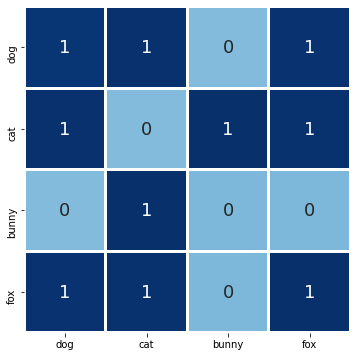

In [14]:
A= [[1,1,0,1], [1,0,1,1], [0,1,0,0], [1,1,0,1]]
labels=['dog', 'cat', 'bunny', 'fox']

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 18})

drawHeatmapMatrix(A, A, labels, labels, normalize="all", format=".0f", cbar=False)

plt.show()

Finally, lets see how this population grows with the given rules, and we will also add a new initial condition where the first animal has to be a dog or a cat:

In [15]:
v = np.array([1,1,0,0]).T
cats, dogs, bunnies, foxes = [], [], [], []

for N in range(16):

  vn = matrix_power(A,N).dot(v)
  
  dogs.append(vn[0])
  cats.append(vn[1])
  bunnies.append(vn[2])
  foxes.append(vn[3])

df = pd.DataFrame()
df['Dog'] = dogs
df['Cat'] = cats
df['Bunny'] = bunnies
df['Fox'] = foxes
df['Total'] = df.sum(axis=1)

df.index += 1
df['Sequence length'] = df.index
display(df)

,Dog,Cat,Bunny,Fox,Total,Sequence length
1,1,1,0,0,2,1
2,2,1,1,2,6,2
3,5,5,1,5,16,3
4,15,11,5,15,46,4
5,41,35,11,41,128,5
6,117,93,35,117,362,6
7,327,269,93,327,1016,7
8,923,747,269,923,2862,8
9,2593,2115,747,2593,8048,9
10,7301,5933,2115,7301,22650,10


Percentage of each species when approaching infinity can be calculated from the matrix eigenvectors:

In [16]:
# matrix eigenvectors
_,C = np.linalg.eig(A)

# eigenvector corresponding to the largest eigenvalue
v0 = (C[:,0])

# percentages
print("Dogs {:.2f}%, Cats {:.2f}%, Bunnies {:.2f}%, Foxes {:.2f}%".format(*v0/sum(v0)*100))

Dogs 32.23%, Cats 26.22%, Bunnies 9.32%, Foxes 32.23%
